# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

x shape: (70,) | y shape: (70,) | z shape: (70, 2)


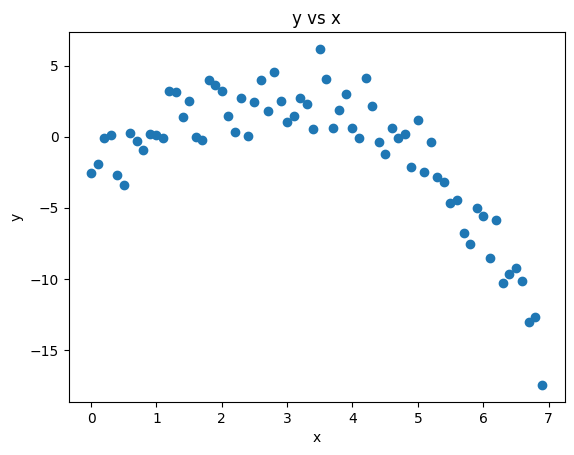

In [48]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
x = xy_data[:, 0]
y = xy_data[:, 1]
print(f"x shape: {x.shape} | y shape: {y.shape} | z shape: {xy_data.shape}")

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")
plt.show()



### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [84]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    x = data_matrix[:, 0]
    y = data_matrix[:, 1]

    N = x.shape[-1]

    degree = min(k, N-1)
    lsq_matrix = np.column_stack(tuple((x**i for i in range(degree+1))))
    lsq_matrix_T = lsq_matrix.T
    optimal_params = np.linalg.inv(lsq_matrix_T.dot(lsq_matrix)).dot(lsq_matrix_T).dot(y)

    y_pred = lsq_matrix.dot(optimal_params.T)
    residuals = y - y_pred

    print(f"optimal params for {degree} degree polynomial model:", optimal_params)
    return optimal_params, y_pred, residuals 

Use the tests below to check the outputs of the function you have written:

In [43]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
polyfit = polyreg(test_matrix, k=0)
beta_test = polyfit[0]
res_test = polyfit[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

optimal params for 2 degree polynomial model: [ 2. -7.  3.]
optimal params for 0 degree polynomial model: [3.1]


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

optimal params for 2 degree polynomial model: [-3.29001695  4.8140849  -0.90655092]
optimal params for 3 degree polynomial model: [-1.99933209  2.48524869 -0.05667063 -0.08211404]
optimal params for 4 degree polynomial model: [-2.33666859  3.53081505 -0.75005666  0.07494529 -0.01138111]

2nd degree polynomial fit
SSE: 172.18102528988547
R Squared: 0.8876297774918224

3rd degree polynomial fit
SSE: 152.40580488915805
R Squared: 0.9005356474205022

4th degree polynomial fit
SSE: 151.22778969027115
R Squared: 0.9013044535638857


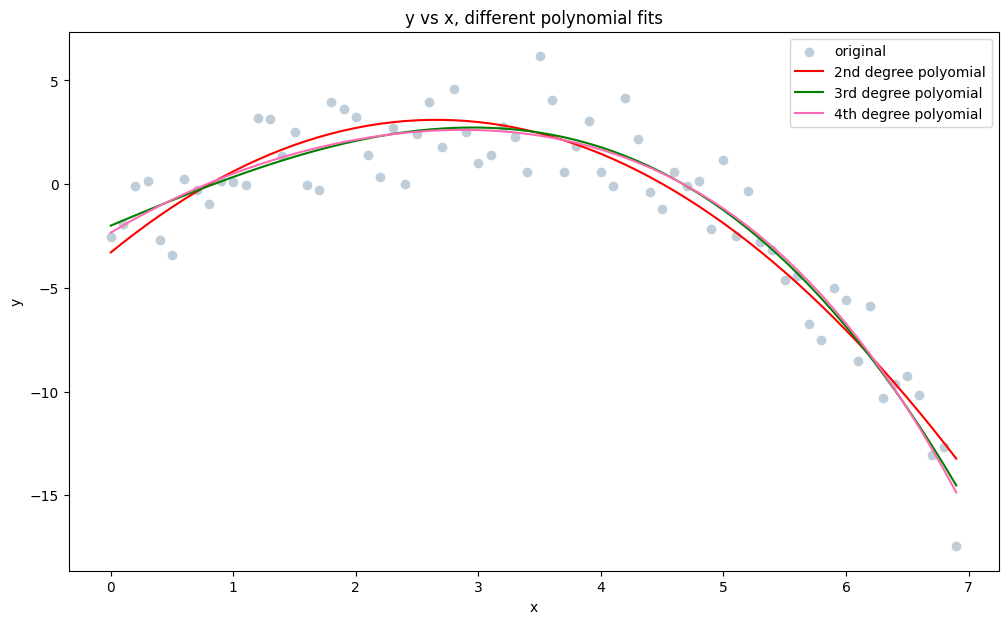

In [83]:
#Your code here
polyfit_2 = polyreg(data_matrix=xy_data, k=2)
polyfit_3 = polyreg(data_matrix=xy_data, k=3)
polyfit_4 = polyreg(data_matrix=xy_data, k=4)

y_pred_2 = polyfit_2[1]
y_pred_3 = polyfit_3[1]
y_pred_4 = polyfit_4[1]

SSE_2 = (np.linalg.norm(y_pred_2 - y))**2
SSE_3 = (np.linalg.norm(y_pred_3 - y))**2
SSE_4 = (np.linalg.norm(y_pred_4 - y))**2
var = np.var(y); SSE_0 = var * y.shape[-1]

R_sqr_2 = 1 - SSE_2/SSE_0
R_sqr_3 = 1 - SSE_3/SSE_0
R_sqr_4 = 1 - SSE_4/SSE_0

print(f"\n2nd degree polynomial fit\nSSE: {SSE_2}\nR Squared: {R_sqr_2}")
print(f"\n3rd degree polynomial fit\nSSE: {SSE_3}\nR Squared: {R_sqr_3}")
print(f"\n4th degree polynomial fit\nSSE: {SSE_4}\nR Squared: {R_sqr_4}")

# predicted values
plt.scatter(x, y, label="original", color="#bfcdd9")
plt.plot(x,y_pred_2, "r", label="2nd degree polyomial")
plt.plot(x,y_pred_3, "g", label="3rd degree polyomial")
plt.plot(x,y_pred_4, "hotpink", label="4th degree polyomial")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("y vs x, different polynomial fits")
plt.show()


 #### State which model you choose and briefly justify your choice.

 <span style="color:green">3rd degree polynomial seems sufficient. Picking any higher polynomial will just end up overfitting the model. </span>.
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

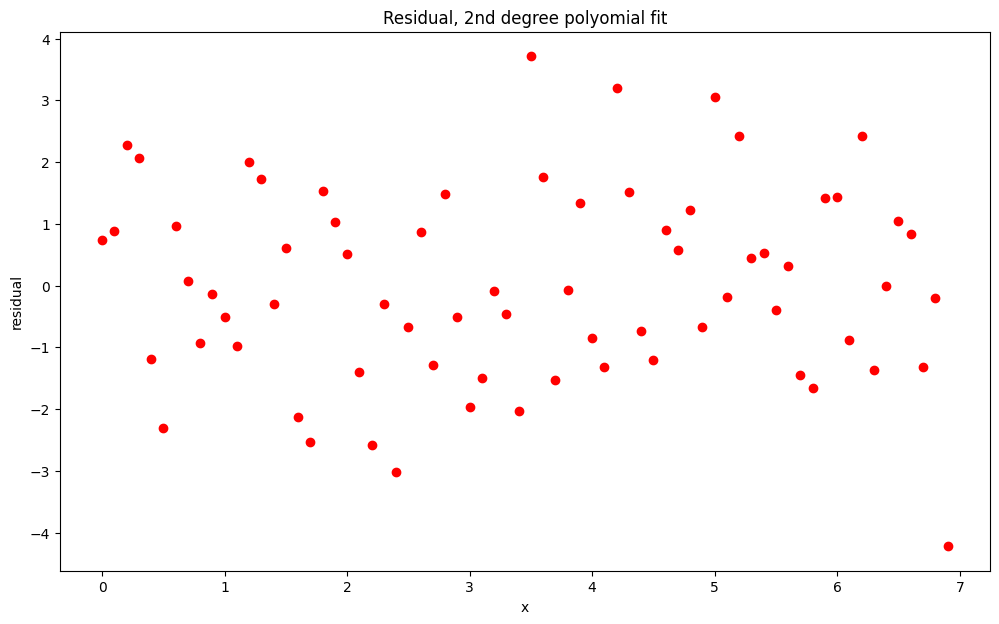

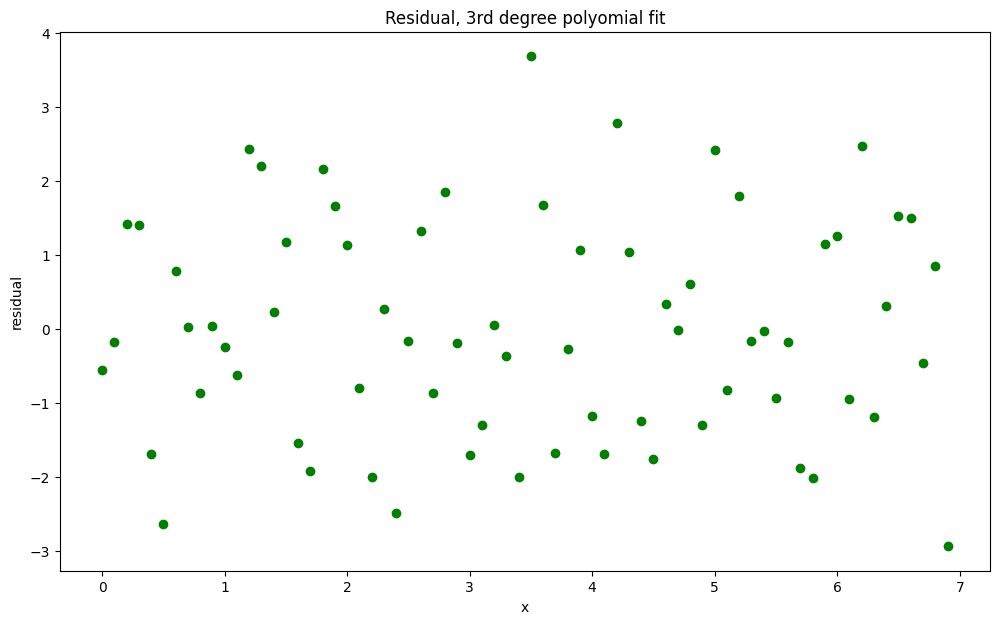

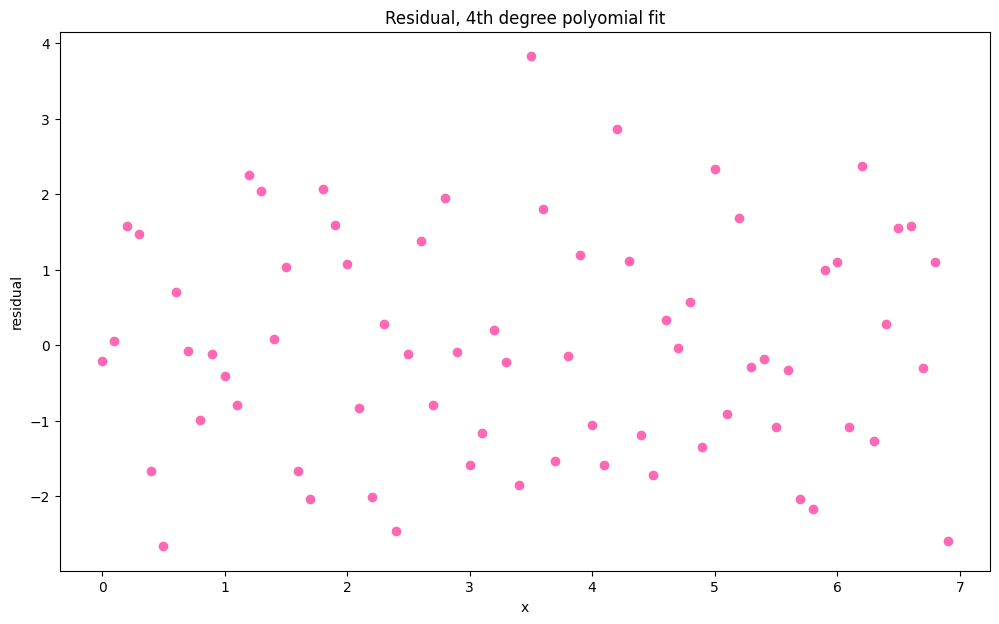

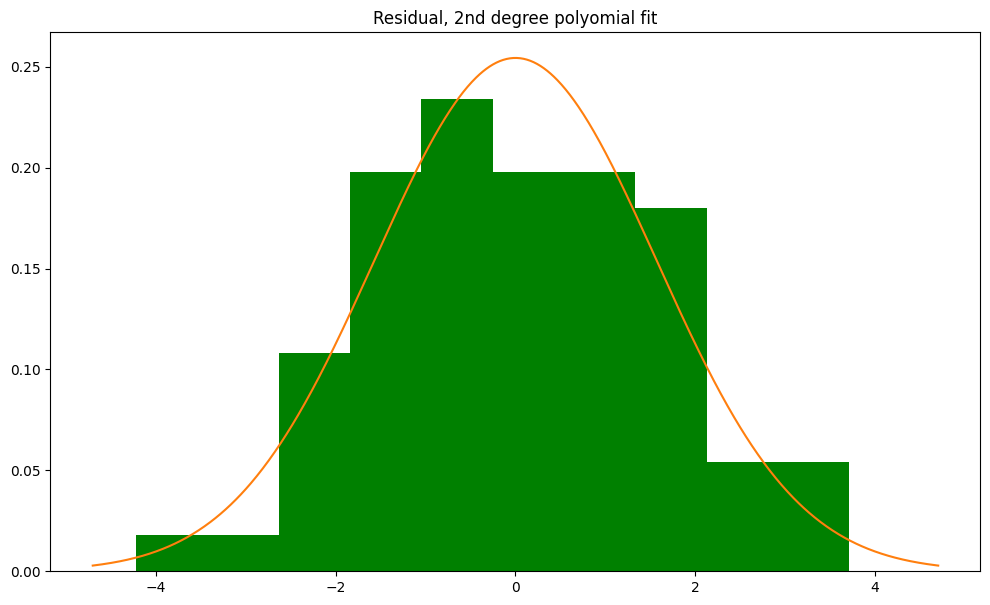

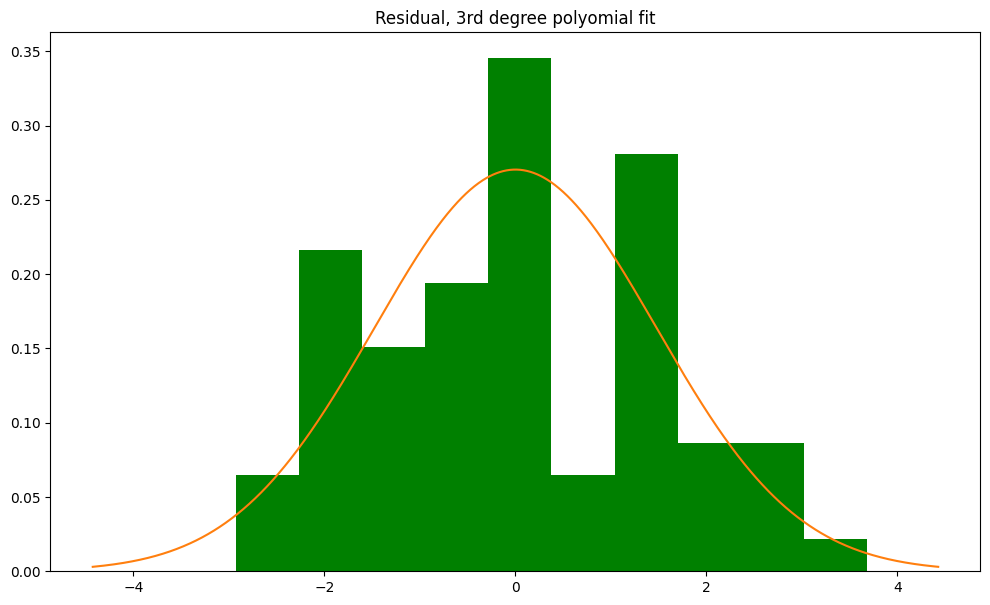

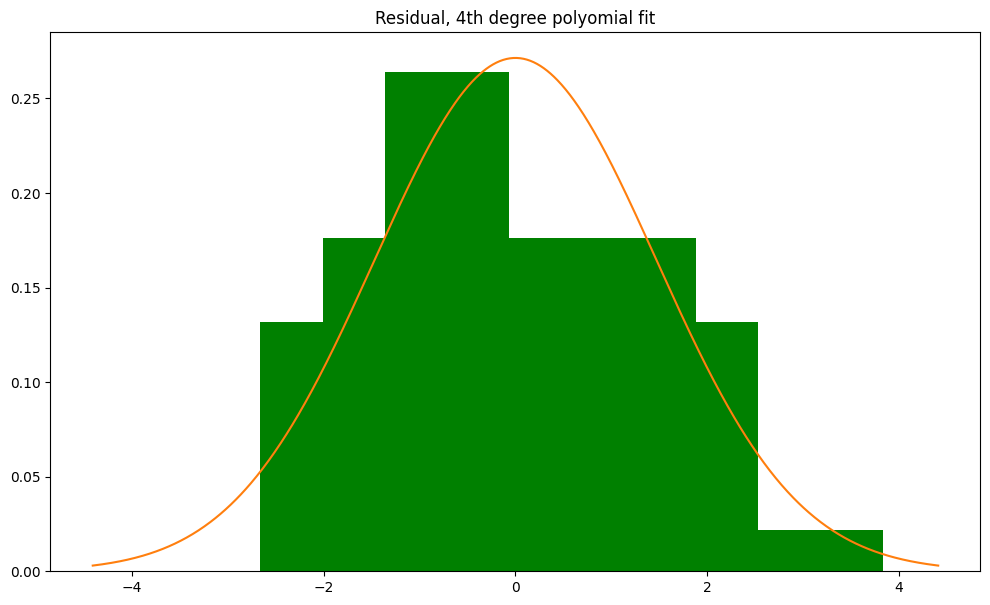

In [103]:
#Your code here
from scipy.stats import norm
#residuals
residual_2 = polyfit_2[2]
residual_3 = polyfit_3[2]
residual_4 = polyfit_4[2]

plt.scatter(x, residual_2, color="red")
plt.xlabel("x")
plt.ylabel("residual")
plt.title("Residual, 2nd degree polyomial fit")
plt.show()

plt.scatter(x, residual_3, color="green")
plt.xlabel("x")
plt.ylabel("residual")
plt.title("Residual, 3rd degree polyomial fit")
plt.show()

plt.scatter(x, residual_4, color="hotpink")
plt.xlabel("x")
plt.ylabel("residual")
plt.title("Residual, 4th degree polyomial fit")
plt.show()

print("\n==========================================================================================\n")

plt.hist(residual_2, bins=10, density=True, facecolor='green')
residual_2_std = np.std(residual_2)
x_residual_2 = np.linspace(start = -3*residual_2_std, stop = 3*residual_2_std, num = 1000)
plt.plot(x_residual_2, norm.pdf(x_residual_2, np.mean(residual_2), residual_2_std))
plt.title("Residual, 2nd degree polyomial fit")
plt.show()

plt.hist(residual_3, bins=10, density=True, facecolor='green')
residual_3_std = np.std(residual_3)
x_residual_3 = np.linspace(start = -3*residual_3_std, stop = 3*residual_3_std, num = 1000)
plt.plot(x_residual_3, norm.pdf(x_residual_3, np.mean(residual_3), residual_3_std))
plt.title("Residual, 3rd degree polyomial fit")
plt.show()

plt.hist(residual_4, bins=10, density=True, facecolor='green')
residual_4_std = np.std(residual_4)
x_residual_4 = np.linspace(start = -3*residual_4_std, stop = 3*residual_4_std, num = 1000)
plt.plot(x_residual_4, norm.pdf(x_residual_4, np.mean(residual_4), residual_4_std))
plt.title("Residual, 4th degree polyomial fit")
plt.show()